In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pickle #save encoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [32]:
df = pd.read_csv('./work/viikko10/datasets/housing.csv')

In [33]:
    # longitude
    # latitude
    # housing_median_age
    # total_rooms
    # total_bedrooms
    # median_income
    # ocean_proximity

X = df.loc[:, ['longitude', 'latitude', 'housing_median_age','total_rooms','total_bedrooms','median_income', 'ocean_proximity']]
y = df.loc[:, ['median_house_value']]

In [34]:
X = X.fillna(0)
Xorg = X
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'),
                                      ['ocean_proximity'])],
                       remainder='passthrough')
X = ct.fit_transform(X)

In [35]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 0)

In [36]:
# Feature Scaling
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)

y_test = scaler_y.transform(y_test)

In [37]:
model = Sequential()
model.add(Dense(100, input_dim=X.shape[1], activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
history=model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test,y_test))
# model = Sequential()
# model.add(Dense(100, input_dim=X.shape[1], activation='relu'))
# model.add(Dropout(0.15))
# model.add(Dense(50, activation='relu'))
# model.add(Dropout(0.15))
# model.add(Dense(25, activation='relu'))
# model.add(Dropout(0.15))
# model.add(Dense(1, activation='linear'))
# model.compile(loss='mse', optimizer='adam', metrics=['mse'])
# history=model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test,y_test))

Epoch 1/50
1032/1032 [==============================] - 7s 5ms/step - loss: 0.4329 - mse: 0.4329 - val_loss: 0.3611 - val_mse: 0.3611
Epoch 2/50
1032/1032 [==============================] - 5s 4ms/step - loss: 0.3762 - mse: 0.3762 - val_loss: 0.4119 - val_mse: 0.4119
Epoch 3/50
1032/1032 [==============================] - 5s 5ms/step - loss: 0.3896 - mse: 0.3896 - val_loss: 0.3186 - val_mse: 0.3186
Epoch 4/50
1032/1032 [==============================] - 5s 5ms/step - loss: 0.3445 - mse: 0.3445 - val_loss: 0.3116 - val_mse: 0.3116
Epoch 5/50
1032/1032 [==============================] - 5s 5ms/step - loss: 0.3384 - mse: 0.3384 - val_loss: 0.3210 - val_mse: 0.3210
Epoch 6/50
1032/1032 [==============================] - 5s 5ms/step - loss: 0.3297 - mse: 0.3297 - val_loss: 0.3109 - val_mse: 0.3109
Epoch 7/50
1032/1032 [==============================] - 5s 5ms/step - loss: 0.3251 - mse: 0.3251 - val_loss: 0.3025 - val_mse: 0.3025
Epoch 8/50
1032/1032 [==============================] - 5s 5ms

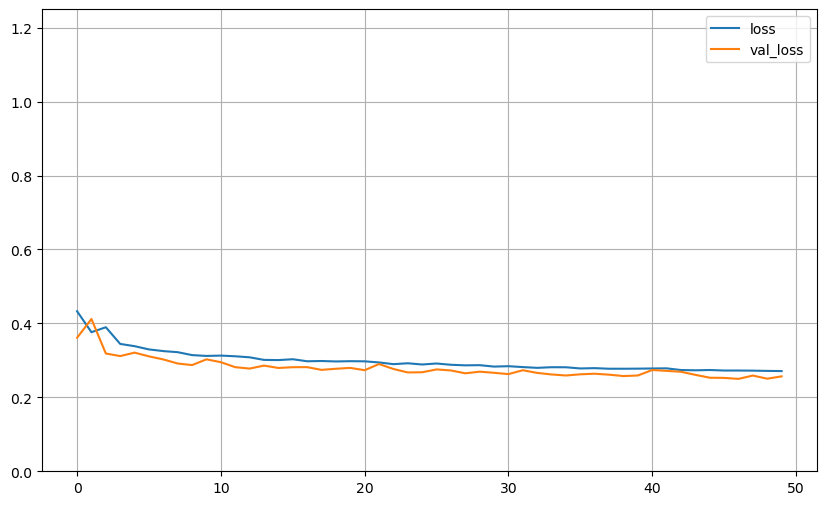

In [51]:
# Visualisoidaan mallin oppiminen
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.ylim(bottom=0, top=5 * min(history.history['val_loss']))
plt.grid(True)
plt.show()

In [49]:
y_pred = scaler_y.inverse_transform(model.predict(X_test))
y_test = scaler_y.inverse_transform(y_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print ('\nann:')
print (f'r2: {r2}')
print (f'mae: {mae}')
print (f'rmse: {rmse}\n')

129/129 [==============================] - 0s 3ms/step

ann:
r2: -3.231738225834812
mae: 5.693348304163871e+40
rmse: 6.5149196417002215e+40



In [40]:
# tallentaan malli levylle
model.save('./work/viikko10/model/housing-ann-model.h5')

# save encoder to disk
with open('./work/viikko10/model/housing-ann-ct.pickle', 'wb') as f:
    pickle.dump(ct, f)

# save scalers to disk
with open('./work/viikko10/model/housing-ann-scaler_x.pickle', 'wb') as f:
    pickle.dump(scaler_x, f)

with open('./work/viikko10/model/housing-ann-scaler_y.pickle', 'wb') as f:
    pickle.dump(scaler_y, f)

/opt/conda/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
